In [1]:
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import model
import kernels
import utils
import trainer
import draw

# Loading data

In [2]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Data visualization

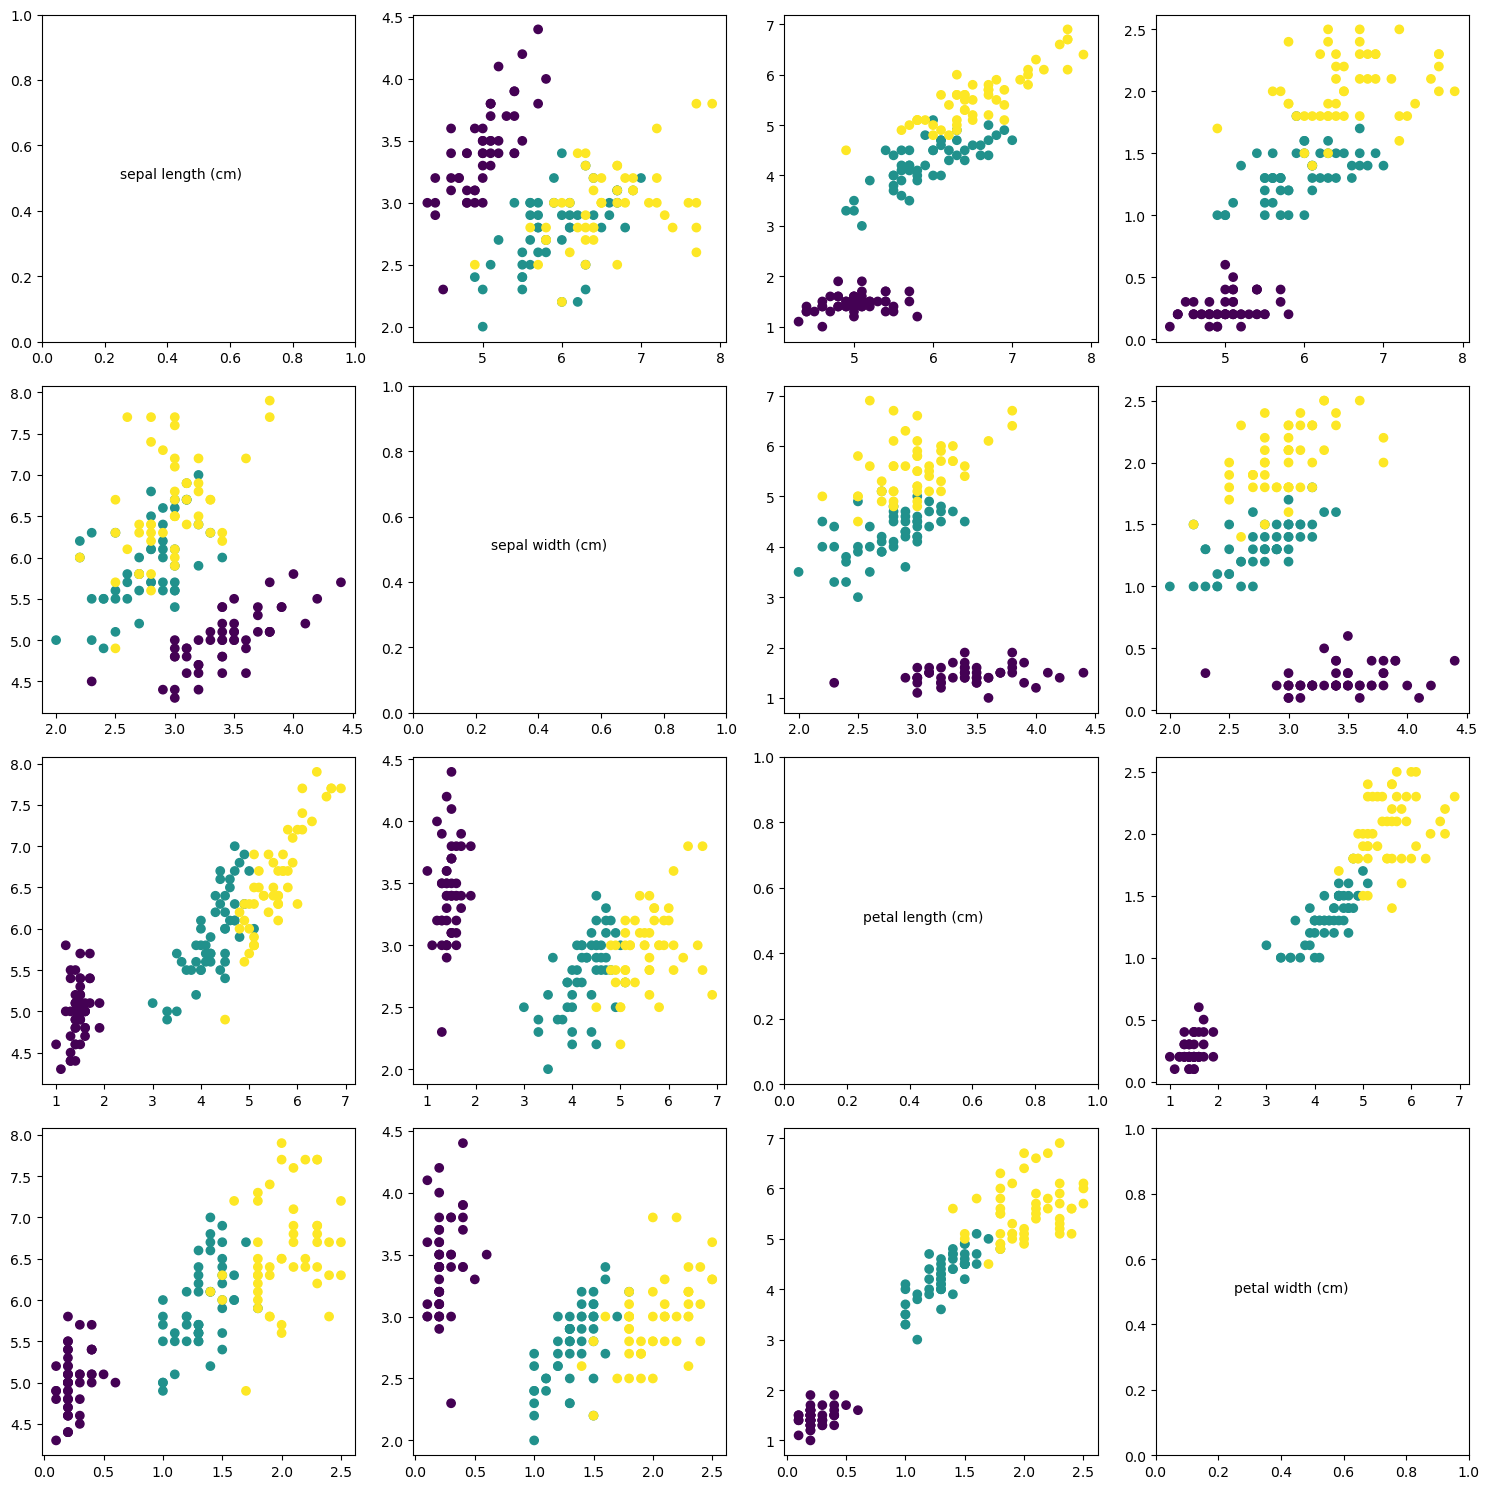

In [3]:
draw.plot_features_data(X, Y, iris.feature_names)

# Initialization

In [4]:
model = model.Model(train_Y.shape[0], utils.max_distance(train_X), kernels.Gauss, 2)
trainer = trainer.Trainer()

# Training

Epoch 1 completed
Epoch 2 completed
Epoch 3 completed
Epoch 4 completed
Epoch 5 completed
Epoch 6 completed
Epoch 7 completed
Epoch 8 completed
Epoch 9 completed
Epoch 10 completed
Epoch 11 completed
Epoch 12 completed
Ready!


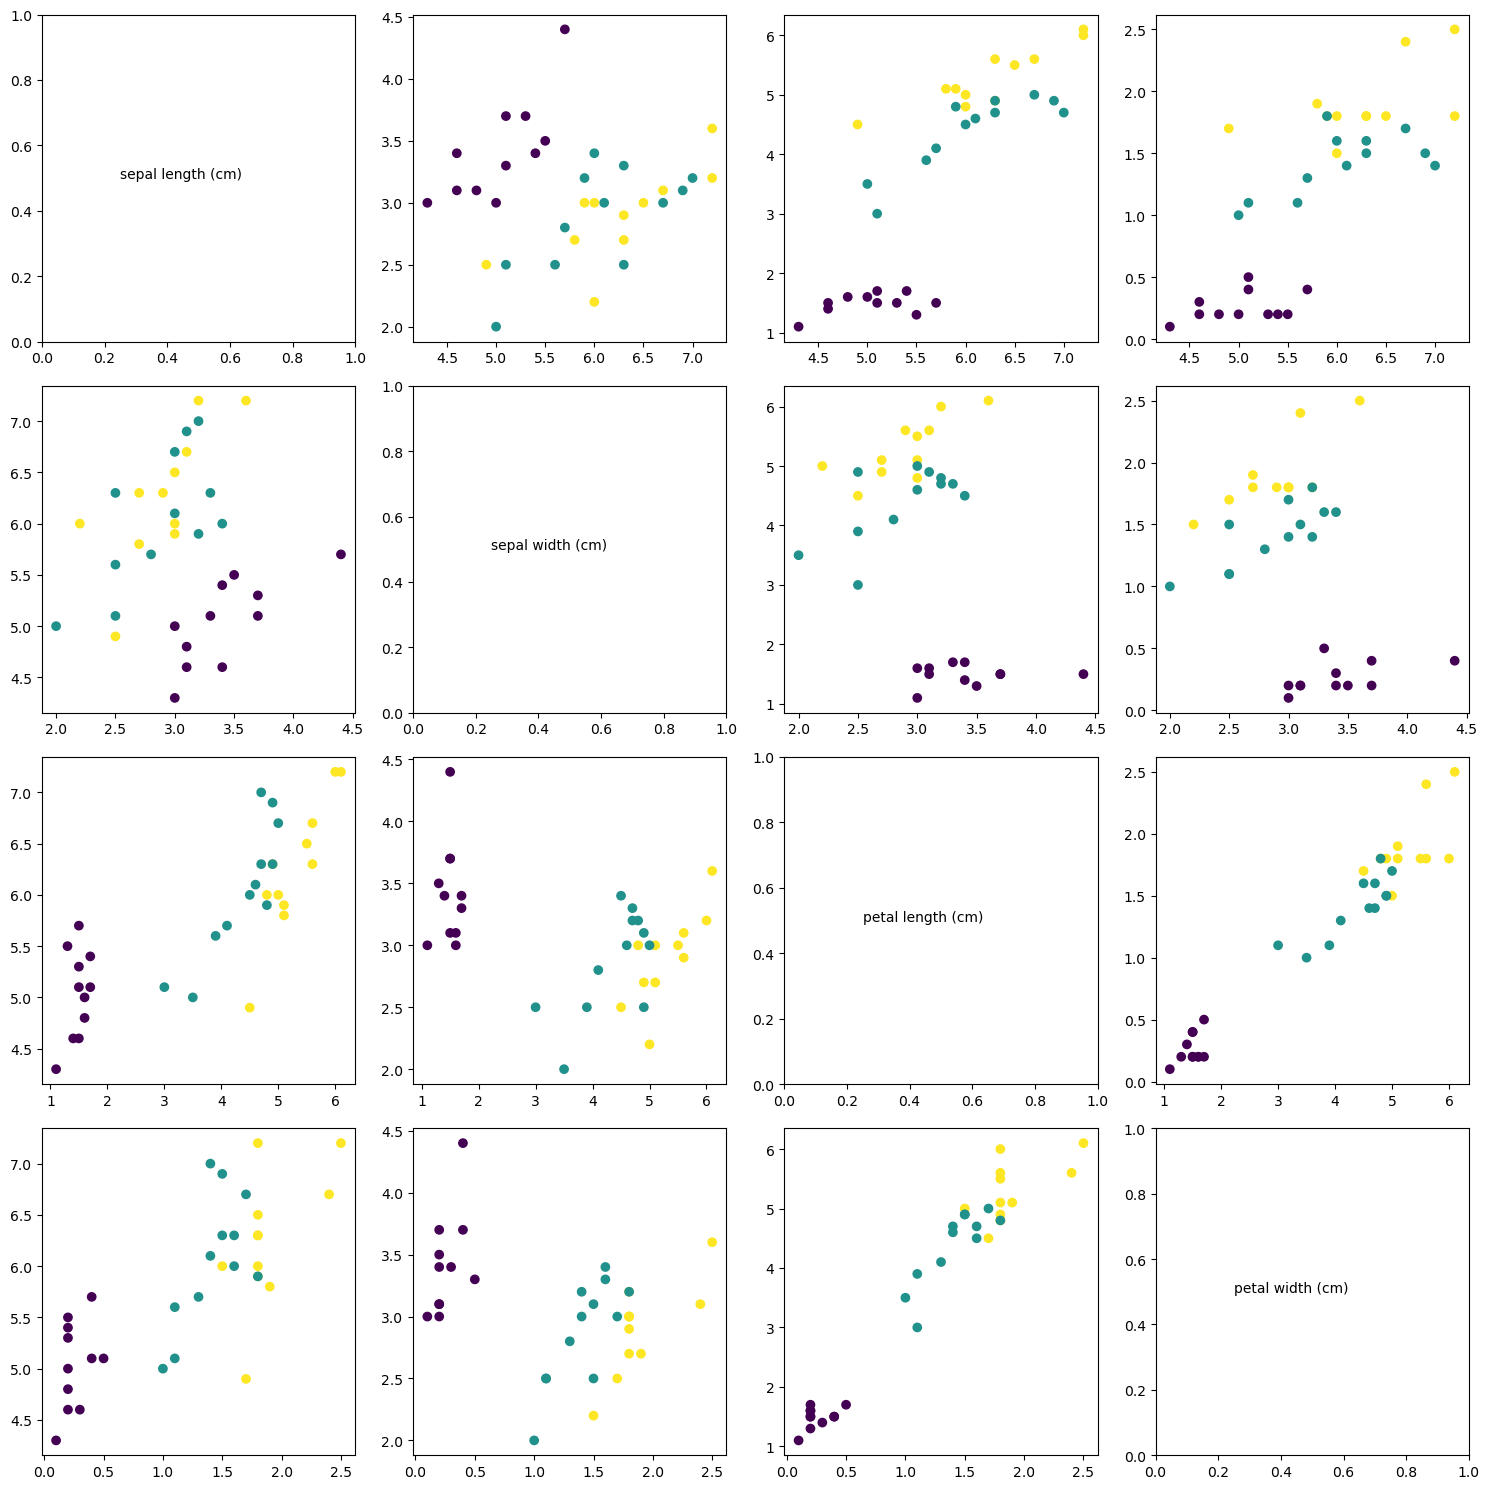

In [5]:
trainer.train(model, train_X, train_Y, 20)
non_zero_weights = model.non_zero_weights()
draw.plot_features_data(train_X[non_zero_weights], train_Y[non_zero_weights], iris.feature_names)

# Visualization results

43/45
Accuracy: 0.9555555555555556


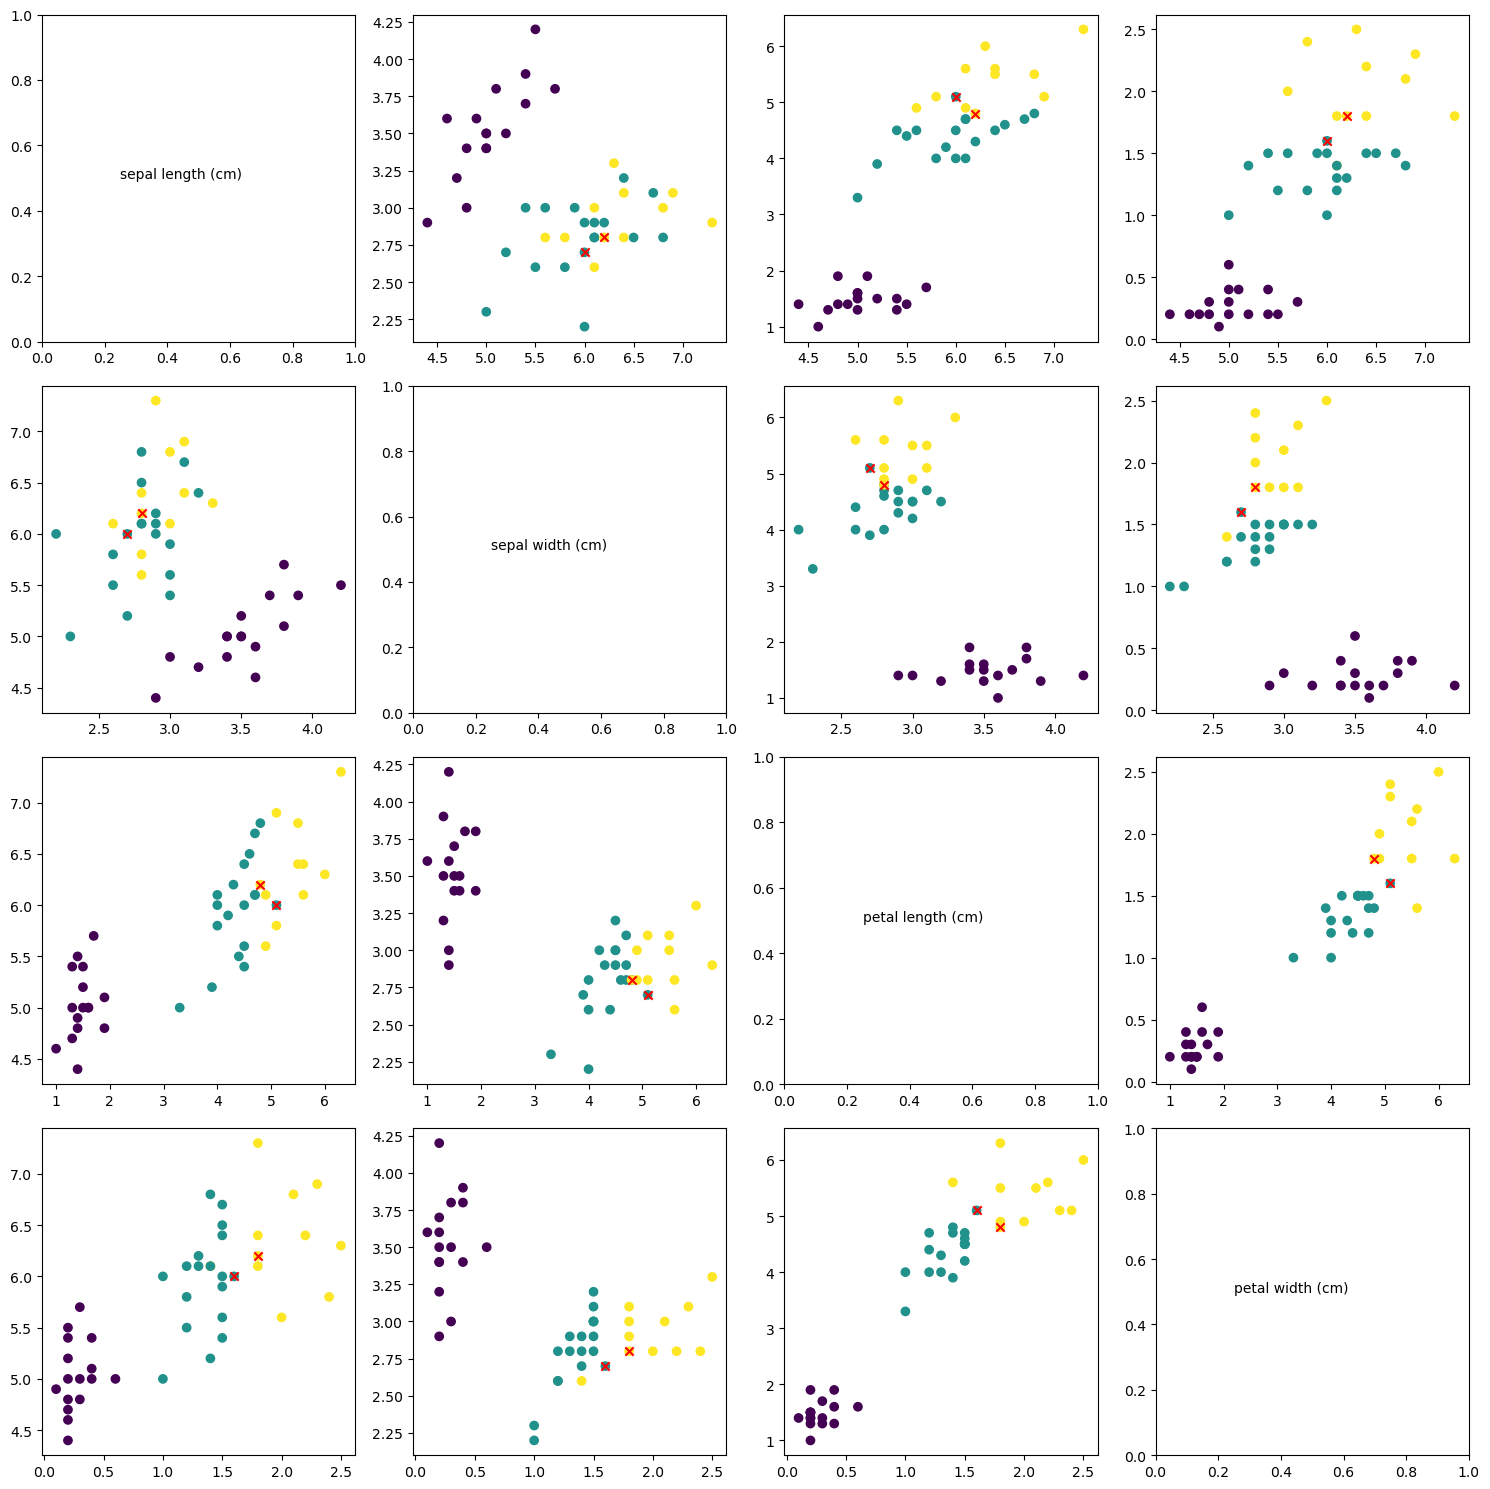

In [6]:
predicts = model.predicts(test_X, train_X, train_Y)
utils.accuracy(predicts, test_Y)
wrongs = utils.wrong_indexes(predicts, test_Y)
draw.plot_features_data(test_X, test_Y, iris.feature_names, wrongs)

# Compare with Sklearn

44/45
Accuracy: 0.9777777777777777


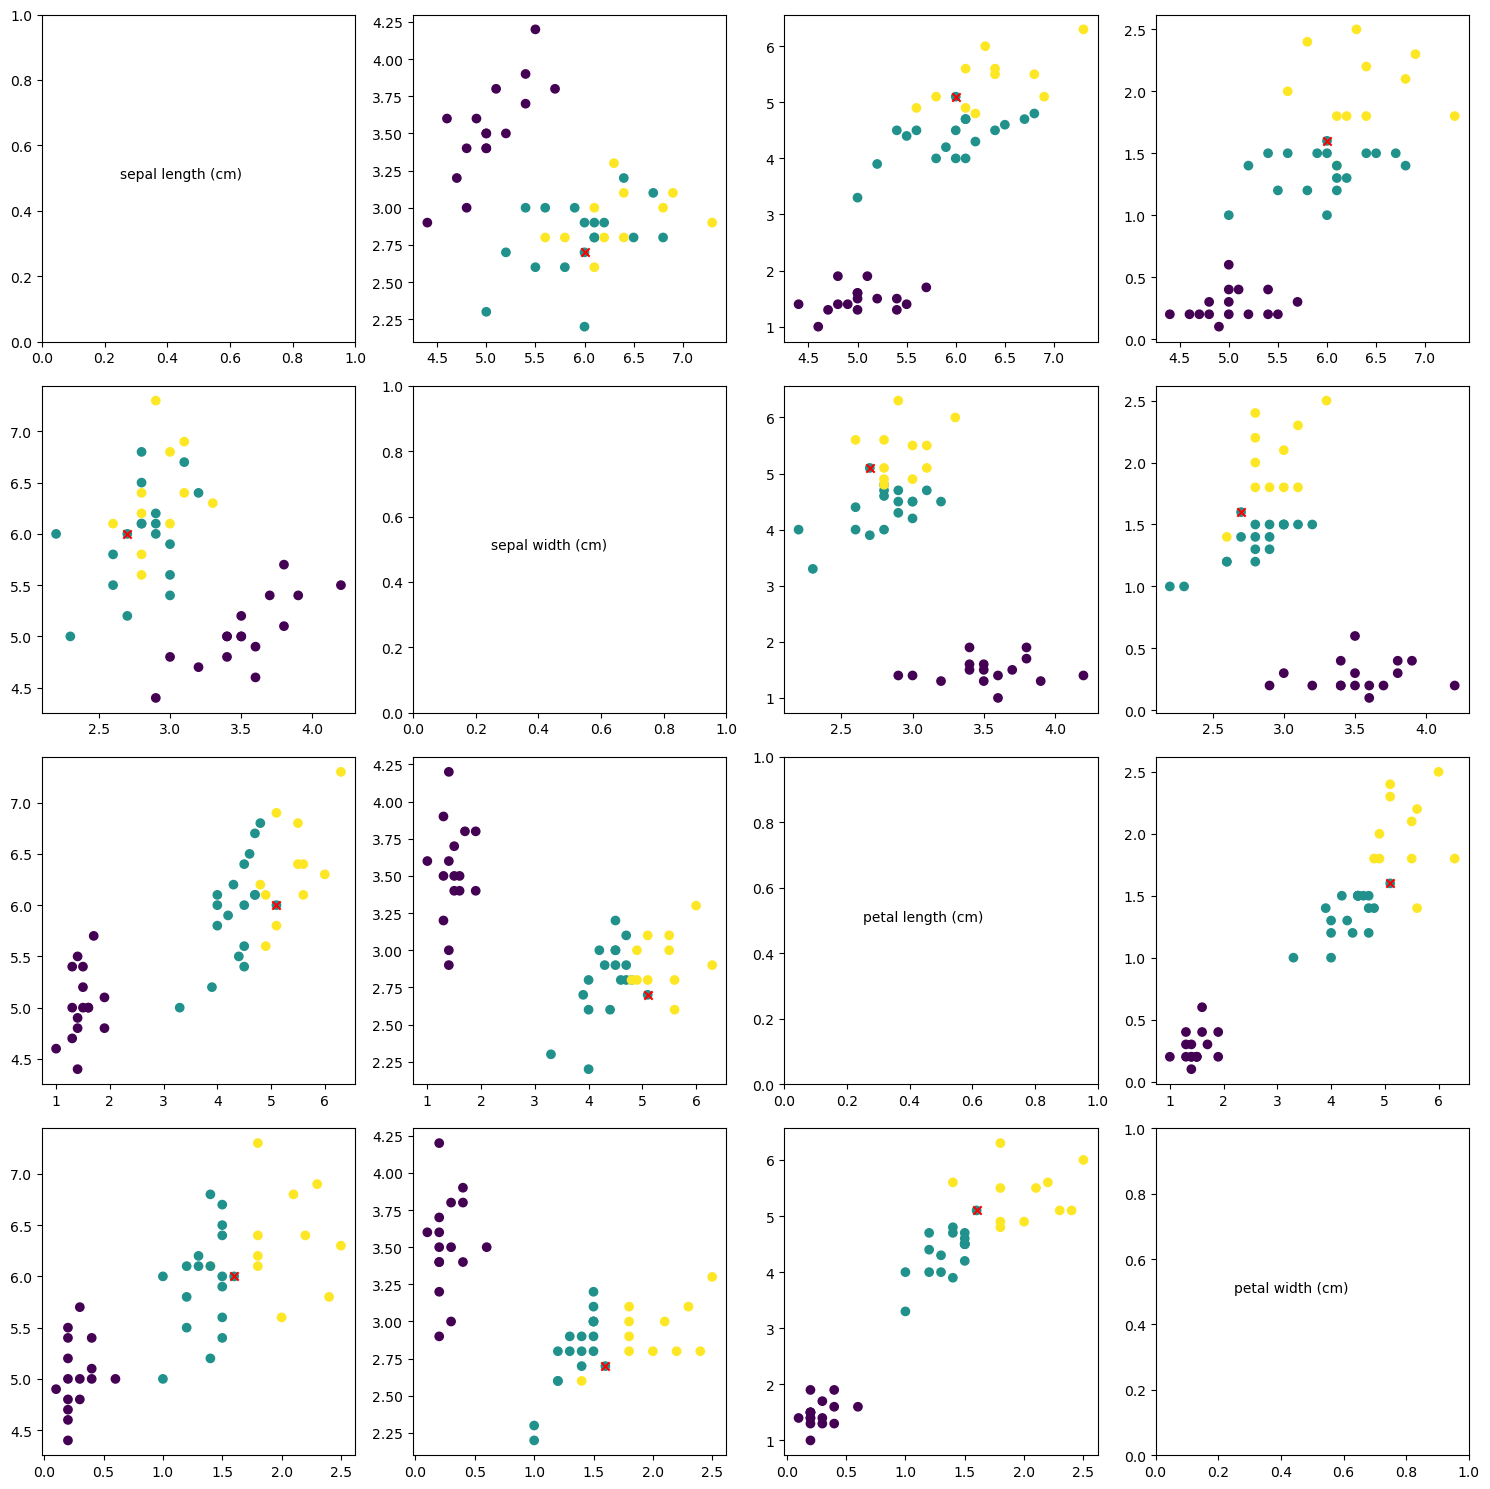

In [7]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(train_X, train_Y)
neigh_preds = neigh.predict(test_X)
utils.accuracy(neigh_preds, test_Y)
idx = np.where(neigh_preds != test_Y)
draw.plot_features_data(test_X, test_Y, iris.feature_names, idx)